<a href="https://colab.research.google.com/github/JJang-likit/GoingDeeper_Aiffel/blob/main/GoingDeeper_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoingDeeper / 세그멘테이션

- 그동안 다뤄온 이미지 분류(image classification), 객체 인식(object detection) 모델은 이미지에서 어떤 물체의 종류를 분류하거나 물체의 존재와 위치를 탐지해낸다.
- 세그멘테이션은 픽셀 수준에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리해내는 방법으로 쉽게 생각하면 이미지 분할 기술이라고 이해할 수 있다.
- 우리 일상 속에서 방송국이나 BJ들이 사용하는 배경과 사람을 분리하는 크로마키, 의료영상에서 정상세포와 암세포를 분리판정하거나 자율주행 시스템에서 도로와 다른 오브젝트를 구분하는 등의 용도로 사용되고 있다.

## 세그멘테이션의 종류
- 세그멘테이션은 크게 두 가지의 방식으로 나뉠 수 있는데 첫번째는 시맨틱 세그멘테이션, 두번째는 인스턴스 세그멘테이션이다.
- 영역을 분리한다는 관점에서는 비슷하지만 접근 방식에 따라 문제의 정의와 모델을 구성하는 방식이 달라진다.

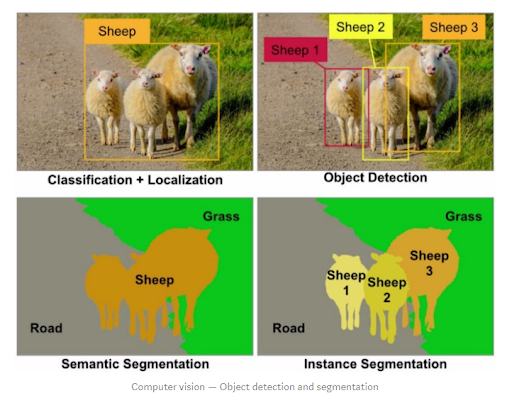

- 위의 사진에서 좌측 상단의 사진은 어떤 물체가 모여있는 영역의 위치를 인식하고 물체들이 양이라는 것을 판별(Classification)한다.
- 반면 우측 상단의 사진은 개별 양들의 개체 하나하나의 위치를 정확히 식별하는 객체 인식(Object Detection)의 접근법을 보여준다.
- 좌측 하단의 사진은 양, 길, 풀밭의 영역을 정확하게 구분하지만 양들 각각을 구분하지는 않는데 이런 방식을 시맨틱 세그멘테이션이라고 한다.
- 우측 하단은 양의 개체들의 영역을 각각 필셀 단위로 정확하게 구분하는데 이것을 인스턴스 세그멘테이션이라고 한다.

### **시맨틱 세그멘테이션**
- 시맨틱 세그멘테이션의 대표적인 모델은 U-Net이 있다.
- 시맨틱 세그멘테이션은 가장 마지막 레이어의 채널 개수가 2라는 점에서 확인할 수 있다.
- 대표적으로 인물사진 모드라면 사람영역과 배경 의료 인공지능에서는 세포 사진에서 정상 세포와 암세포로 지정해 적용할 수 있다.
- 시맨틱 세그멘테이션에서는 이미지의 각 필셀에 해당하는 영역의 클래스별 정보가 필요하다.

### **인스턴스 세그멘테이션**
- 인스턴스 세그멘테이션은 같은 클래스 내에서도 각 개체(instance)들을 분리하여 세그멘테이션을 수행한다.
- 인스턴스 세그멘테이션은 시맨틱 세그멘테이션보다 더 어려운 작업이라고 생각 할 수 있다.
- 인스턴스 세그멘테이션을 하기 위해서 먼저 물체 검출(Object Detection)모델로 각 객체를 구분하고 이후에 각 개체별로 시맨틱 세그멘테이션을 수행하면 인스턴스 세그멘테이션을 할 수 있다.
- 이런 방식을 대표하는 모델이 Mask R_CNN 모델이다.
- Mask R_CNN모델은 2-stage Object Detection의 가장 대표적인 Faster-R-CNN을 계승한 모델이다.

## 주요 세그멘테이션 모델


### **FCN(Fully Convolutional Network)**
- FCN은 이미지넷 챌린지에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델이다.
- FCN은 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여준다.
- CNN을 붙이는 이유는 CNN은 이미지 내 위치의 특성을 유지하기 때문이다. 
- 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 마지막 CNN은 1x1의 커널 크기와 클래스의 개수만큼의 채널을 가지게 된다.
- 하지만 히트맵의 크기는 원본 이미지보다 작은데 CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문이다.
- 이를 키워주는 방법을 upsampling 이라고 한다.
- upsampling에는 여러가지 방법이 있는데 FCN에서는 Deconvolution과 interpolation 방식을 활용한다.
- Deconvolution은 컨볼루션 연산을 거꾸로 해준 것을 의미하고 interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀을 추정하는 방법이다.
- FCN-32s의 경우 upsampling만 하면 원하는 세그멘테이션 맵을 얻을 수 있다.
- 하지만 skip architecture라는 방법을 사용하면 더 좋은 성능을 기대할 수 있다.
- FCN논문 리뷰 : https://medium.com/@msmapark2/fcn-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-fully-convolutional-networks-for-semantic-segmentation-81f016d76204

### **U-Net**
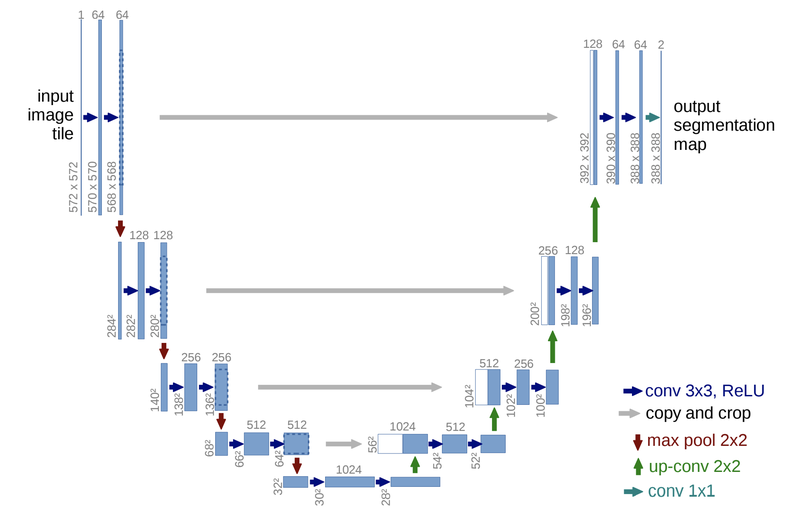

U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있다. FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것이다. 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러가지 이미지 태스크에서 사용되었다는 점이다. 특시 의학 관련 분야에서 사용되었다.






- 타일 기법 : FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어냈지만 U-Net은 타일 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했다.
- 픽셀 단위로 라벨을 매긴다면 데이터셋에 클래스 간 데이터 양의 불균형이 생긴다. 이를 해결해주기 위해서 weight map을 학습때 사용해준다. weight map의 weight는 신경망의 학습 파라미터를 말하는것으로 착각할 수 있지만 실제로 말하는 weight는 손실 함수에 적용되는 가중치를 의미한다.
- 참고 논문 : https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a

### **DeepLab 계열**


DeepLabv3+는 이름에서 볼 수 있듯이 이전에 많은 버전을 거쳐 개선을 이뤄온 네트워크이다. 처음 DeepLab 모델이 제안된 뒤 이 모델을 개선하기 위해서 Atrous Convolution과 Spatial Pyramid Pooling 등 많은 방법들이 제안되어 왔다.

- 참고 기술블로그 : https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/
- 참고 기술 블로그 : https://medium.com/hyunjulie/2%ED%8E%B8-%EB%91%90-%EC%A0%91%EA%B7%BC%EC%9D%98-%EC%A0%91%EC%A0%90-deeplab-v3-ef7316d4209d

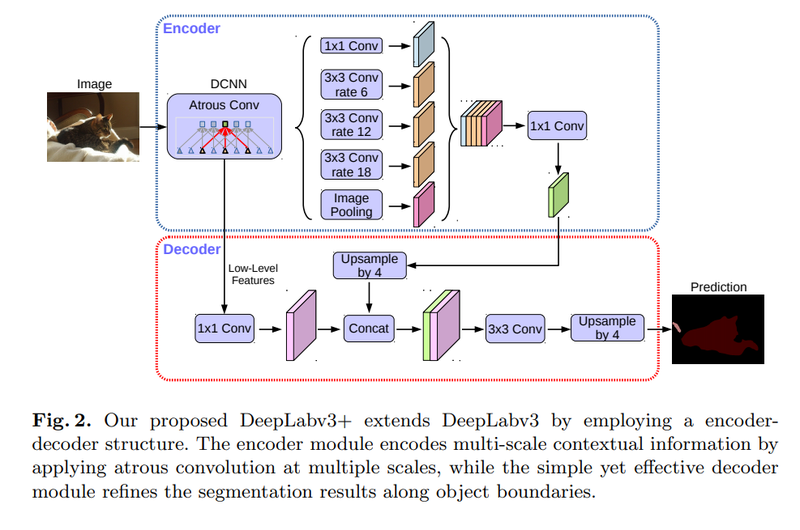



*   전체 구조
  - 위 그림을 보면 U-Net에 비해서 구조가 다소 복잡하게 보인다.
  - U-Net에서의 Contracting path와 Expansive path의 역할을 하는 것이 위 그림의 인코더와 디코더이다.
  - 인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈이고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈이다.
  - 3x3 Convolution을 사용한 U-Net과 다르게 DeepLabV3+는 Atrous Convolution을 사용하고 있다.





*   Atrous Convolution
  - Atrous Convolution은 간단하게 말하면 띄엄띄엄 보는 컨볼루션이다.
  - 일반적으로 차례차례 보는 컨볼루션과 달리 더 넓은 영역을 보도록 하기 위해서 커널이 일정 간격으로 떨어져서 띄엄띄엄 보게 된다.
  - 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영영의 정보를 커버할 수 있다.


## 세그멘테이션의 평가
- 딥러닝 기반으로 시맨틱 세그멘테이션을 수행하는 다양한 모델들을 어떻게 평가하는지에 대한 평가 지표가 있다.
- 일반적으로 시맨틱 세그멘테이션의 결과값은 이미지의 크기에 맞는 세그멘테이션 맵 크기와 시맨틱 클래스의 수에 맞는 채널 크기를 갖는다.
- 여기서 각 채널의 max probability에 따라 해당 위치의 클래스가 결정된다.

### **픽셀별 정확도(Pixel Accuracy)**
- Pixel Accuracy는 쉽게 말해서 픽셀에 따른 정확도를 의미한다.
- 세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제로 생각했을 때 픽셀 별로 정답을 맞추었는지를 True/False로 구분한다.

### **마스크 IoU(Mask Intersection-over-Union)**
- 물체 검출 모델을 평가할 때 정답 라벨과 예측 결과 바운딩 박스 사이의 IoU를 사용한다.
- 마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있다.



In [2]:
# 세그멘테이션 마스크 IoU 계산법

# sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

NameError: ignored

## 다양한 Upsampling 방법
- 세그멘테이션에서는 마스킹 단계의 upsampling이 중요하다.

### **Nearest Neighbor**

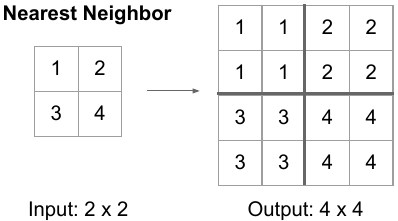

- Nearest upsampling은 이름 그대로 scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법이다.
- 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4의 matrix가 된다. 이때 좌측 상단부터 2x2는 입력 matrix의 1x1과 가장 가깝다. 따라서 해당 값을 그대로 사용하게 된다.

### **Bilinear Interpolation**

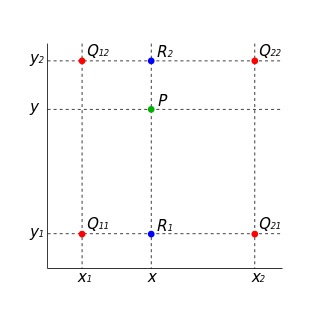

- Bilinear Interpolation 은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식이다.
- 빈 값을 채워넣을 때 축을 두 방향으로 활용하기 때문에 Bilinear interpolation이라고 한다.
- 참고 기술블로그 : https://bskyvision.com/m/789

### **Transposed Convolution**
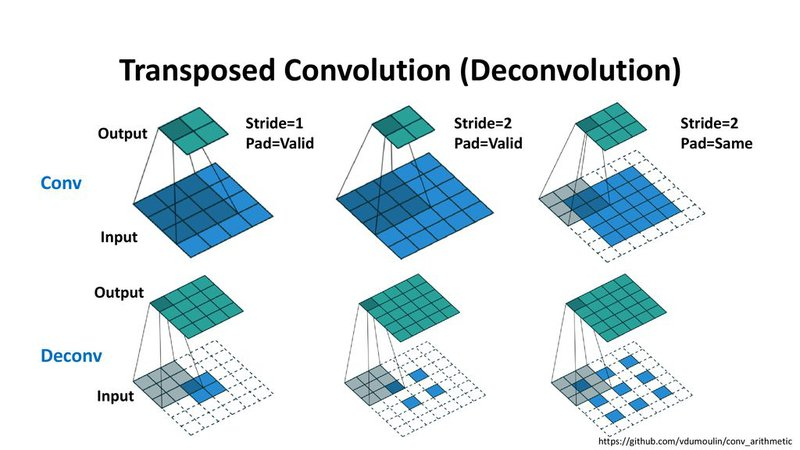
- Transposed Convolution은 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해낸다.